## KMeans - Agrupamento de Dados

In [112]:
#importando as bibliotecas utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [113]:
#lendo a base de dados iris
iris = pd.read_csv('iris.csv')

In [114]:
#exibindo as 5 primeiras linhas
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
#armazenando a classe em Y e exibindo valores unicos
Y = iris.Species
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [116]:
#apagando a coluna Species e guardando as colunas restantes em X
X = iris.drop('Species', axis=1, inplace=False)
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
#metodos para converter valores categoricos em numericos
def convert_classe(classe):
    if classe == 'Iris-setosa':
        return 0
    elif classe == 'Iris-versicolor':
        return 1
    elif classe == 'Iris-virginica':
        return 2

In [118]:
#iris['Species_num'] = iris['Species'].map(convet_classe)

In [119]:
#iris.drop('Species', axis=1, inplace=True)

In [120]:
#aplicando o metodo convert_classe a classe Y
Y = Y.apply(convert_classe)

In [121]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

### Instanciando o algoritimo K-means

In [122]:
kmeans = KMeans(n_clusters=3, init='random')

In [123]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [124]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Tabela de distância

In [125]:
distance = kmeans.fit_transform(X)
distance

array([[0.14694217, 5.0595416 , 3.41925061],
       [0.43816892, 5.11494335, 3.39857426],
       [0.41230086, 5.27935534, 3.56935666],
       [0.51883716, 5.15358977, 3.42240962],
       [0.19796969, 5.10433388, 3.46726403],
       [0.68380699, 4.68148797, 3.14673162],
       [0.41520116, 5.21147652, 3.51650264],
       [0.0599333 , 5.00252706, 3.33654987],
       [0.80099438, 5.32798107, 3.57233779],
       [0.36659514, 5.06790865, 3.3583767 ],
       [0.48784424, 4.89806763, 3.32449131],
       [0.25138019, 4.9966845 , 3.31126872],
       [0.49192682, 5.19103612, 3.46661272],
       [0.90906105, 5.65173594, 3.90578362],
       [1.02019214, 5.10804455, 3.646649  ],
       [1.21309192, 4.88564095, 3.49427881],
       [0.66241377, 5.03090587, 3.495248  ],
       [0.1509702 , 5.02342022, 3.38444981],
       [0.82848778, 4.61792995, 3.11245944],
       [0.39898872, 4.97213426, 3.37738931],
       [0.46172719, 4.6955761 , 3.07471224],
       [0.33762701, 4.9236821 , 3.31506588],
       [0.

In [126]:
distance[0]

array([0.14694217, 5.0595416 , 3.41925061])

<IPython.core.display.Javascript object>


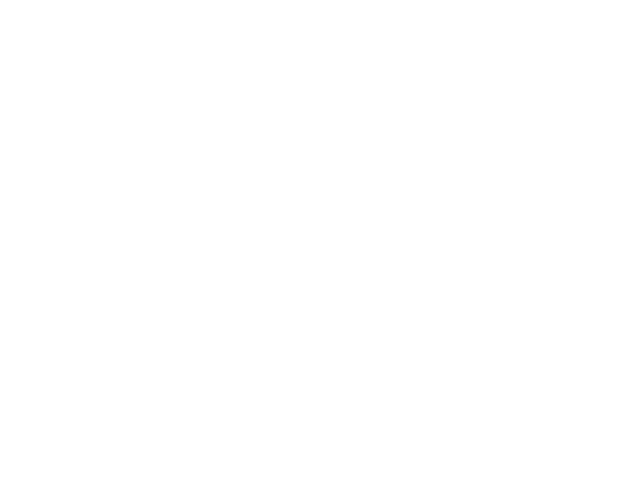

In [127]:
%matplotlib notebook
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters')
plt.show()


In [128]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

### Visualizando Centroids

<IPython.core.display.Javascript object>


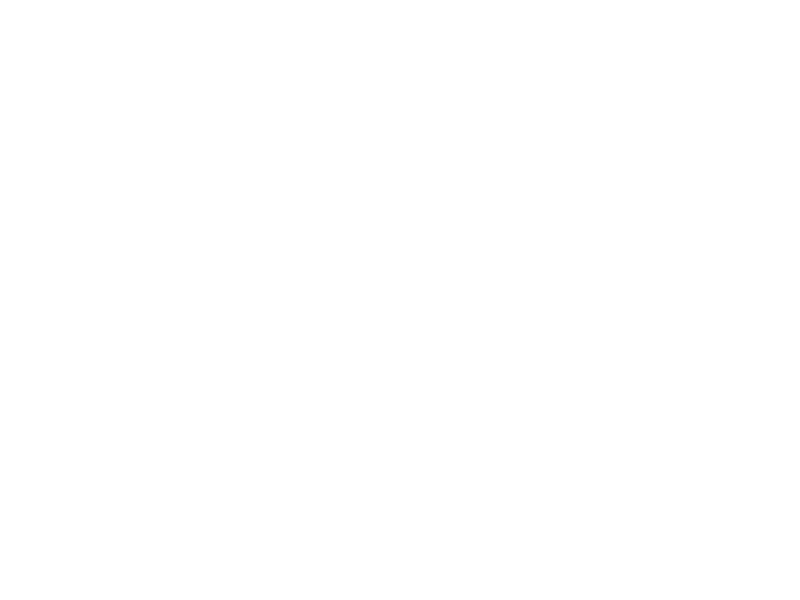

In [129]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

### Agrupando novos dados

In [130]:
data = [[4.12,3.4,1.6,0.7],[5.2,5.8,5.2,6.7],[3.1,3.5,3.3,3.0]]

In [131]:
kmeans.predict(data)

array([0, 1, 2])

### Visualização grafica dos resultados

<IPython.core.display.Javascript object>


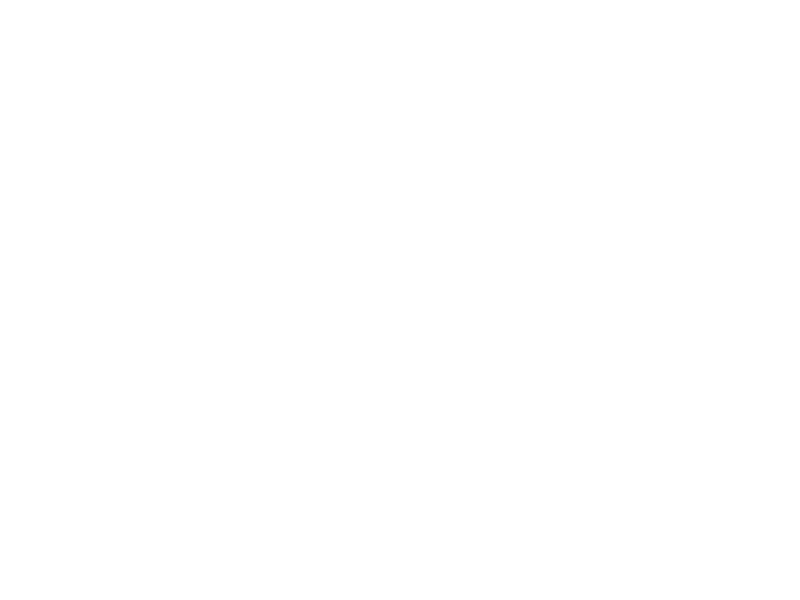

In [132]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(Y))

ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(kmeans.labels_))

### Estimando o valor do parametro k - Metodo do cotovelo(Elbow)

1 680.8244
2 152.36870647733906
3 78.94084142614602
4 57.31787321428571
5 46.53558205128205
6 38.930963049671746
7 34.19068792479662
8 30.773945664097198
9 29.07147459400976
10 26.624666847041844


<IPython.core.display.Javascript object>


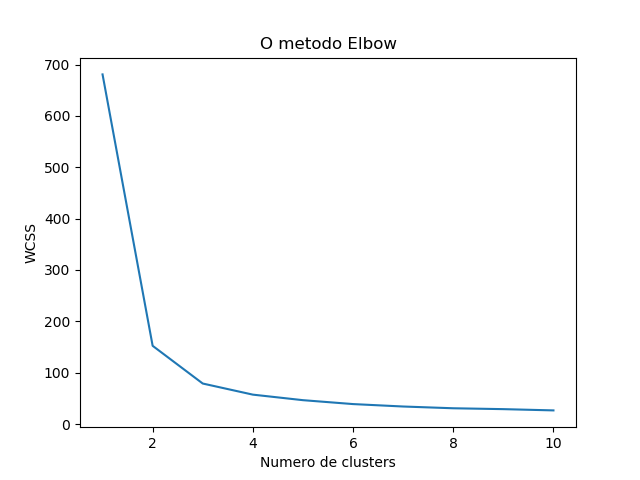

In [133]:
%matplotlib notebook
wcss = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i, init='random')
    kmeans2.fit(X)
    print(i, kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
                     
plt.plot(range(1,11),wcss)
plt.title('O metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()       

### Matriz de Confusão

In [134]:
print(pd.crosstab(Y,kmeans.labels_,rownames=['Real'], colnames=['Previsto'],margins=True))

Previsto   0   1   2  All
Real                     
0         50   0   0   50
1          0   2  48   50
2          0  36  14   50
All       50  38  62  150


### Metricas de Classificação

In [135]:
from sklearn import metrics
clusters = ['clusters 2','cluster 1','cluters 0']
print(metrics.classification_report(Y,kmeans.labels_, target_names=clusters))

              precision    recall  f1-score   support

  clusters 2       1.00      1.00      1.00        50
   cluster 1       0.05      0.04      0.05        50
   cluters 0       0.23      0.28      0.25        50

    accuracy                           0.44       150
   macro avg       0.43      0.44      0.43       150
weighted avg       0.43      0.44      0.43       150

